In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

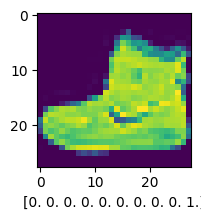

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])
plot_sample(x_train, y_train, 0)

In [5]:


model = models.Sequential([
    layers.Conv2D(32, (2, 2), activation='relu',padding = 'same' ,input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (2, 2), activation='relu', padding = 'same'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\longv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 71ms/step - accuracy: 0.7338 - loss: 0.7293 - val_accuracy: 0.8692 - val_loss: 0.3588
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.8885 - loss: 0.3144 - val_accuracy: 0.8917 - val_loss: 0.2948
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.9023 - loss: 0.2662 - val_accuracy: 0.9016 - val_loss: 0.2666
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9166 - loss: 0.2285 - val_accuracy: 0.9030 - val_loss: 0.2575
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9202 - loss: 0.2117 - val_accuracy: 0.9020 - val_loss: 0.2683


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9023 - loss: 0.2712
Test accuracy: 0.9020000100135803
